In [1]:
from Preprocess import DataGenerator
from Preprocess import DataReader
import io
import glob
from torch.utils.data import DataLoader
from torchvision import transforms
import matplotlib.pyplot as plt

In [2]:
nums = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
lower_char = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u',
              'v', 'w', 'x', 'y', 'z']
upper_char = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U',
              'V', 'W', 'X', 'Y', 'Z']

total = nums + lower_char + upper_char
classes = {}
for i in range(len(total)):
    classes[str(total[i])] = i

In [3]:
char = DataGenerator("Charset/",100)
char.build_charSet(clear_path=True)

Train Folder -> Charset//train/	Expected Images: 100
Test  Folder -> Charset//test/	Expected Images:25

All Images in Train Folder have been Removed
All Images in Test  Folder have been Removed

Train Set Generate Complete!
Test  Set Generate Complete!


In [4]:
captcha = DataGenerator("Captcha/",100)
captcha.build_captchaSet()

Train Folder -> Captcha//train/	Expected Images: 100
Test  Folder -> Captcha//test/	Expected Images:25

PATH Exist! Begin to Build Captcha Dataset...
Train Set Generate Complete!
Test  Set Generate Complete


In [5]:
transform = transforms.Compose([transforms.ToTensor()])

In [7]:
train = DataReader('Charset/train/',transform=transform,class_dict=classes)

In [8]:
trainset = DataLoader(train,batch_size=32)

In [23]:
for batch in trainset:
    features, labels = batch
    break
feature_iter = iter(features)
label_iter = iter(labels)

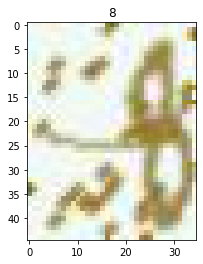

In [51]:
plt.imshow(next(feature_iter).permute(1,2,0))
plt.title(train.classes[next(label_iter)])
plt.show()